### Week2 授業課題1 二次元配列と勾配問題
械学習においては関数の最小値を見つけることが重要になってきます。そのために使われるのが勾配降下法です。 この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。

### 【問題1】1次関数
xが-50から50の範囲で次の式を考えます。

$
y=\frac{1}{2}x+1
$

1 -50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [1]:
#問題１
import numpy as np
import matplotlib.pyplot as plt
import math
x = np.arange(-50,50.1,0.1)
y = (1/2)*x + 1
print(x)
print(y)
len(y)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


1001

### 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [2]:
#問題２
x_y = np.hstack((x.T.reshape(1001,1), y.T.reshape(1001,1)))
print(x_y)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


### 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

$
\large
勾配=\frac{yの変化量}{xの変化量}
$

各変化量は以下の図のように隣同士の要素の差から近似的に求めます。注意

厳密に各点における勾配を求めるには極限（微分）を利用する必要があります
勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります

In [3]:
## 問題３
d_x_y = x_y[1:,:] - x_y[:-1]
gradient = d_x_y[:,1] / d_x_y[:,0]
print(gradient[0:5])
print(gradient.shape)

[0.5 0.5 0.5 0.5 0.5]
(1000,)


### 【問題4】グラフを描く¶
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。 matplotlib.pyplot.plot — Matplotlib 3.1.0 documentation

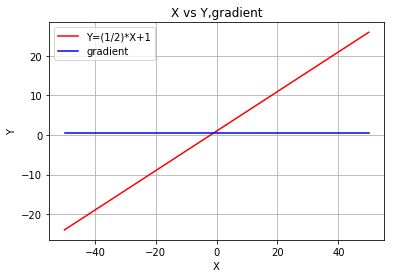

In [4]:
#問題４
def func_graph(_x, _y, _label,
               _x2, _y2, _label2,
               _title, _xlabel, _ylabel):
    plt.title(_title)
    plt.xlabel(_xlabel)
    plt.ylabel(_ylabel)
    plt.plot(_x,_y,color="r",label=_label)
    plt.plot(_x2,_y2,color="b",label=_label2)
    plt.grid()
    plt.legend()
    plt.show()
func_graph(x, y, "Y=(1/2)*X+1",
           x[1:], gradient, "gradient",
           "X vs Y,gradient", "X", "Y")

### 【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。 そして、$y=x^2,  y=2x^2+2^x, y=sin(x^\frac{1}{2})$ についての勾配を求めてください。 x の範囲は前2つが-50から50、最後の1つが0から50です。0.1間隔でndarrayを作成してください。 また、問題4と同様にグラフを描いてください。 ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。 numpy.sin — NumPy v1.16 Manual

In [5]:
def func_gradient(_x_ary, _y_ary):
    _xy_ary = np.hstack((_x_ary.T.reshape(len(_x_ary),1), _y_ary.T.reshape(len(_y_ary),1)))
    
    _dxy_ary = _xy_ary[1:]-_xy_ary[:-1]
    _gradient_ary = _dxy_ary[:,1]/_dxy_ary[:,0]
    return _xy_ary, _gradient_ary

In [6]:
x_ary = np.arange(-50,50.1,0.1)
x3_ary = np.arange(0,50.1,0.1)

formula0_y_ary = (1/2)*x_ary + 1
formula1_y_ary = x_ary**2
formula2_y_ary = 2*x_ary**2 + 2**x_ary
formula3_y_ary = np.sin(x3_ary**(1/2))

xy0_ary, gradient0_ary = func_gradient(x_ary, formula0_y_ary)
xy1_ary, gradient1_ary = func_gradient(x_ary, formula1_y_ary)
xy2_ary, gradient2_ary = func_gradient(x_ary, formula2_y_ary)
xy3_ary, gradient3_ary = func_gradient(x3_ary, formula3_y_ary)

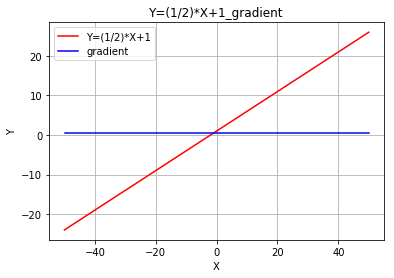

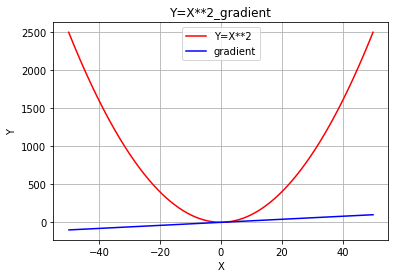

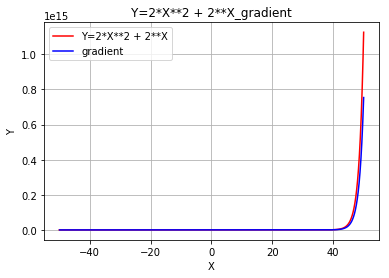

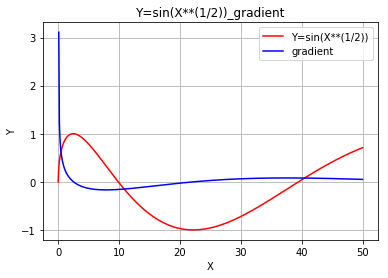

In [7]:
func_graph(xy0_ary[:,0], xy0_ary[:,1], "Y=(1/2)*X+1",
           xy0_ary[1:,0], gradient0_ary, "gradient",
           "Y=(1/2)*X+1_gradient", "X", "Y")
func_graph(xy1_ary[:,0], xy1_ary[:,1], "Y=X**2",
           xy1_ary[1:,0], gradient1_ary, "gradient",
           "Y=X**2_gradient", "X", "Y")
func_graph(xy2_ary[:,0], xy2_ary[:,1], "Y=2*X**2 + 2**X",
           xy2_ary[1:,0], gradient2_ary, "gradient",
           "Y=2*X**2 + 2**X_gradient", "X", "Y")
func_graph(xy3_ary[:,0], xy3_ary[:,1], "Y=sin(X**(1/2))",
           xy3_ary[1:,0], gradient3_ary, "gradient",
           "Y=sin(X**(1/2))_gradient", "X", "Y")

### 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。

今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください。

numpy.ndarray.min — NumPy v1.16 Manual

numpy.ndarray.argmin — NumPy v1.16 Manual

In [8]:
def calculation_of_min_and_garadient(_xy_ary, _gradient_ary):
    _ymin = _xy_ary[:,1].min()
    _ymin_index = _xy_ary[:,1].argmin()
    _index_grad_ary =np.hstack((np.arange(len(_gradient_ary+1)).T.reshape(len(_gradient_ary+1),1), 
                                _gradient_ary.T.reshape(len(_gradient_ary+1),1)))

    if _ymin_index==0:
        return _ymin, _ymin_index, _index_grad_ary[_ymin_index: _ymin_index+2]
    
    return _ymin, _ymin_index, _index_grad_ary[_ymin_index-1: _ymin_index+2]

In [9]:
formula0_title = "Y=(1/2)*X+1"
formula1_title = "Y=X**2"
formula2_title = "Y=2X**2 + 2**X"
formula3_title = "Y=sin(X**(1/2))"

ymin0, ymin0_index, gradient0_ymin_index = calculation_of_min_and_garadient(xy0_ary, gradient0_ary)
ymin1, ymin1_index, gradient1_ymin_index = calculation_of_min_and_garadient(xy1_ary, gradient1_ary)
ymin2, ymin2_index, gradient2_ymin_index = calculation_of_min_and_garadient(xy2_ary, gradient2_ary)
ymin3, ymin3_index, gradient3_ymin_index = calculation_of_min_and_garadient(xy3_ary, gradient3_ary)

print("-------------\n数式　{}　\n Yの最小値：{}, \n Yの最小値のINDEX：{}\n Yの最小値のINDEX付近の勾配\nINDEX　      勾配\n{}"
      .format(formula0_title, ymin0, ymin0_index, gradient0_ymin_index))
print("-------------\n数式　{}　\n Yの最小値：{}, \n Yの最小値のINDEX：{}\n Yの最小値のINDEX付近の勾配\nINDEX　      勾配\n{}"
      .format(formula1_title, ymin1, ymin1_index, gradient1_ymin_index))
print("-------------\n数式　{}　\n Yの最小値：{}, \n Yの最小値のINDEX：{}\n Yの最小値のINDEX付近の勾配\nINDEX　      勾配\n{}"
      .format(formula2_title, ymin2, ymin2_index, gradient2_ymin_index))
print("-------------\n数式　{}　\n Yの最小値：{}, \n Yの最小値のINDEX：{}\n Yの最小値のINDEX付近の勾配\nINDEX　      勾配\n{}"
      .format(formula3_title, ymin3, ymin3_index, gradient3_ymin_index))

-------------
数式　Y=(1/2)*X+1　
 Yの最小値：-24.0, 
 Yの最小値のINDEX：0
 Yの最小値のINDEX付近の勾配
INDEX　      勾配
[[0.  0.5]
 [1.  0.5]]
-------------
数式　Y=X**2　
 Yの最小値：5.048709793414476e-25, 
 Yの最小値のINDEX：500
 Yの最小値のINDEX付近の勾配
INDEX　      勾配
[[ 4.99e+02 -1.00e-01]
 [ 5.00e+02  1.00e-01]
 [ 5.01e+02  3.00e-01]]
-------------
数式　Y=2X**2 + 2**X　
 Yの最小値：0.9505505632959851, 
 Yの最小値のINDEX：498
 Yの最小値のINDEX付近の勾配
INDEX　      勾配
[[ 4.97000000e+02 -4.17018331e-01]
 [ 4.98000000e+02  2.48242824e-02]
 [ 4.99000000e+02  4.69670085e-01]]
-------------
数式　Y=sin(X**(1/2))　
 Yの最小値：-0.9999997540298113, 
 Yの最小値のINDEX：222
 Yの最小値のINDEX付近の勾配
INDEX　      勾配
[[ 2.21000000e+02 -6.38842256e-04]
 [ 2.22000000e+02  4.87447793e-04]
 [ 2.23000000e+02  1.60611589e-03]]
